<a href="https://colab.research.google.com/github/andersoncam2514-blip/Regresi-n-lineal/blob/main/Copia_de_regresi%C3%B3n_lineal_taxi_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#@title Copyright 2023 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Colabs

El curso  de Machine Learning utiliza Colabs (Nube que permite escribir y ejecutar codigos Python a travez del navegador de Google) para ejercisios de programación. Colab  es la implementación de Google [Jupyter Notebook](https://jupyter.org/). Para mas información sobre Colabs y cómo utilizarlos, ir a [Welcome to Colaboratory](https://research.google.com/colaboratory).

# Regresión Lineal
En este Colab, utilizarás un conjunto de datos reales para un modelo que prediga la tarifa de un viaje en taxi en Chicago, Illinois.

## Objetivos de aprendizaje
Despues de completar el Colab, serás capaz de:

  * Leer un archivos .csv utiizando la libreria [pandas](https://developers.google.com/machine-learning/glossary/#pandas) DataFrame.
  * Explorar un conjunto de datos [dataset](https://developers.google.com/machine-learning/glossary/#data_set) con librerias de visualización de Pytom.
  * Experimentar con diferentes caracteristicas [features](https://developers.google.com/machine-learning/glossary/#feature) par5a construir un modelo de regresión lineal.
  * Ajustar los [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter).
  * Comparar ejecuciones de entrenamientoutilizando el error cuadratico [root mean squared error](https://developers.google.com/machine-learning/glossary/#root-mean-squared-error-rmse) y curvas de perdida [loss curves](https://developers.google.com/machine-learning/glossary/#loss-curve).

## Descripción de conjunto de datos
El conjunto de datos para este ejercisio [dataset for this exercise](https://storage.mtls.cloud.google.com/mlcc-nextgen-internal/chicago_taxi_train.csv) se deriva de [City of Chicago Taxi Trips dataset](https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew). Los datos para este ejercisio son un subconjunto de los datos de viajes en Taxi y se centra en un periodo de dos dias en mayo del 2022.

# Parte 1 - Configuración de ejercisio


---

## Cargar modulos requeridos

Este ejercisio depende de varias librerias Python para ayudar con la manipulación de datos, tareas de aprendizaje automatico y visualización de datos

**Instrucciones**
1. Ejecuta **Instalar las librerias requeridas** codigos de celda (below).
1. Ejecuta **Cargar dependencias** codigo de celda (below).

In [42]:
#@title Install required libraries

!pip install google-ml-edu==0.1.3 \
  keras~=3.8.0 \
  matplotlib~=3.10.0 \
  numpy~=2.0.0 \
  pandas~=2.2.0 \
  tensorflow~=2.18.0

print('\n\nAll requirements successfully installed.')



All requirements successfully installed.


In [43]:
#@title Code - Load dependencies

# data
import numpy as np
import pandas as pd

# machine learning
import keras
import ml_edu.experiment
import ml_edu.results

# data visualization
import plotly.express as px

## Cargar el dataset


El siguiente bloque de código carga el conjunto de datos y crea un DataFrame de pandas.

Puedes pensar en un DataFrame como una hoja de cálculo con filas y columnas. Las filas representan ejemplos individuales de datos y las columnas representan los atributos asociados a cada ejemplo.

In [44]:
# @title
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

## Actualizar el DataFrame

El siguiente bloque de código actualiza el DataFrame para usar únicamente columnas específicas del conjunto de datos.

Observa que la salida muestra solo una muestra del conjunto de datos, pero debería haber suficiente información para que puedas identificar las características asociadas al conjunto de datos y echar un vistazo a los datos reales de algunos ejemplos.

In [45]:
#@title Code - Read dataset

# Updates dataframe to use specific columns.
training_df = chicago_taxi_dataset.loc[:, ('TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE')]

print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


# Parte 2 - Exploración del Conjunto de Datos


---

## Ver estadísticas del conjunto de datos

Gran parte de la mayoría de los proyectos de aprendizaje automático consiste en conocer bien tus datos. En este paso, utilizarás el método ``DataFrame.describe`` para ver estadísticas descriptivas sobre el conjunto de datos y responder algunas preguntas importantes acerca de los datos.

**Instrucciones**
1. Ejecuta **Ver estadisticas del conjunto de datos**.
1. Inspecciona la salida y responde estas preguntas:
  * ¿Cuál es la tarifa máxima?
  * ¿Cuál es la distancia promedio de todos los viajes?
  * ¿Cuántas compañías de taxi hay en el conjunto de datos?
  * ¿Cuál es el tipo de pago más frecuente?
  * ¿Alguna característica tiene datos faltantes?
1. Ejecuta el codigo **Ver respuestas a las estadísticas del conjunto de datos** para comprobar tus respuestas.


Es posible que te preguntes por qué aparecen grupos de valores `NaN` (no un número) en la salida. Al trabajar con datos en Python, puedes ver este valor si el resultado de un cálculo no se puede obtener o si falta información. Por ejemplo, en el conjunto de datos de taxism`PAYMENT_TYPE` y `COMPANY` son características categóricas no numéricas; información numérica como la media y el valor máximo no tiene sentido para características categóricas, por lo que la salida muestra `NaN`.

In [46]:
#@title Code - View dataset statistics

print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.describe(include='all')

Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


In [47]:
#@title Double-click or run to view answers about dataset statistics

answer = '''
What is the maximum fare? 				              Answer: $159.25
What is the mean distance across all trips? 		Answer: 8.2895 miles
How many cab companies are in the dataset? 		  Answer: 31
What is the most frequent payment type? 		    Answer: Credit Card
Are any features missing data? 				          Answer: No
'''

# You should be able to find the answers to the questions about the dataset
# by inspecting the table output after running the DataFrame describe method.
#
# Run this code cell to verify your answers.

# What is the maximum fare?
max_fare = training_df['FARE'].max()
print("What is the maximum fare? 				Answer: ${fare:.2f}".format(fare = max_fare))

# What is the mean distance across all trips?
mean_distance = training_df['TRIP_MILES'].mean()
print("What is the mean distance across all trips? 		Answer: {mean:.4f} miles".format(mean = mean_distance))

# How many cab companies are in the dataset?
num_unique_companies =  training_df['COMPANY'].nunique()
print("How many cab companies are in the dataset? 		Answer: {number}".format(number = num_unique_companies))

# What is the most frequent payment type?
most_freq_payment_type = training_df['PAYMENT_TYPE'].value_counts().idxmax()
print("What is the most frequent payment type? 		Answer: {type}".format(type = most_freq_payment_type))

# Are any features missing data?
missing_values = training_df.isnull().sum().sum()
print("Are any features missing data? 				Answer:", "No" if missing_values == 0 else "Yes")

What is the maximum fare? 				Answer: $159.25
What is the mean distance across all trips? 		Answer: 8.2895 miles
How many cab companies are in the dataset? 		Answer: 31
What is the most frequent payment type? 		Answer: Credit Card
Are any features missing data? 				Answer: No


## Generar una matriz de correlación

Una parte importante del aprendizaje automático es determinar qué [features](https://developers.google.com/machine-learning/glossary/#feature) se correlacionan con [label](https://developers.google.com/machine-learning/glossary/#label). Si alguna vez has tomado un taxi, probablemente sabes que la tarifa generalmente está asociada con la distancia recorrida y la duración del viaje. Pero, ¿existe una forma de aprender más sobre qué tan bien estas características se correlacionan con la tarifa (label)?

En este paso, usarás una **matriz de correlación** para identificar las características cuyos valores se correlacionan bien con la variable objetivo. Los valores de correlación tienen los siguientes significados:

  * **`1.0`**: correlación positiva perfecta; es decir, cuando una característica aumenta, la otra también aumenta.
  * **`-1.0`**: correlación negativa perfecta; es decir, cuando una característica aumenta, la otra disminuye.
  * **`0.0`**: sin correlación; las dos columnas  [no tienen relación lineal.](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

n general, cuanto mayor sea el valor absoluto de la correlación, mayor será su poder predictivo.

**Instrucciones**

1. Inspecciona el código en la celda **Ver matriz de correlación**.
1. Ejecuta la celda **Ver matriz de correlación** e inspecciona la salida.
1. **Comprueba tu comprensión** respondiendo estas preguntas:
  * ¿Qué característica se correlaciona más fuertemente con la tarifa FARE?
  * ¿Qué característica se correlaciona menos fuertemente con la tarifa FARE?


In [48]:
#@title Code - View correlation matrix
training_df.corr(numeric_only = True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


In [49]:
#@title Double-click to view answers about the correlation matrix

# Which feature correlates most strongly to the label FARE?
# ---------------------------------------------------------
answer = '''
The feature with the strongest correlation to the FARE is TRIP_MILES.
As you might expect, TRIP_MILES looks like a good feature to start with to train
the model. Also, notice that the feature TRIP_SECONDS has a strong correlation
with fare too.
'''
print(answer)


# Which feature correlates least strongly to the label FARE?
# -----------------------------------------------------------
answer = '''The feature with the weakest correlation to the FARE is TIP_RATE.'''
print(answer)


The feature with the strongest correlation to the FARE is TRIP_MILES.
As you might expect, TRIP_MILES looks like a good feature to start with to train
the model. Also, notice that the feature TRIP_SECONDS has a strong correlation
with fare too.

The feature with the weakest correlation to the FARE is TIP_RATE.


## Visualizar relaciones en el conjunto de datos

A veces es útil visualizar las relaciones entre las características de un conjunto de datos; una forma de hacerlo es mediante un pair plot. Un **pair plot** genera una cuadrícula de gráficos por pares para visualizar la relación de cada característica con todas las demás, todo en un solo lugar.

**Instrucciones**
1. Ejecuta la celda de código **Ver pair plot**.

In [50]:
#@title Code - View pairplot
px.scatter_matrix(training_df, dimensions=["FARE", "TRIP_MILES", "TRIP_SECONDS"])

# Parte 3 - Modelo de entrenamiento


---

## Definir funciones para construir y entrenar un modelo

El código que necesitas para construir y entrenar tu modelo se encuentra en la celda **Define ML functions**. Si deseas explorar este código, expande la celda y échale un vistazo.

**Instrucciones**
1. Ejecuta la celda de código **Define ML functions**.

In [51]:
#@title Code - Define ML functions

def create_model(
    settings: ml_edu.experiment.ExperimentSettings,
    metrics: list[keras.metrics.Metric],
) -> keras.Model:
  """Create and compile a simple linear regression model."""
  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  inputs = {name: keras.Input(shape=(1,), name=name) for name in settings.input_features}
  concatenated_inputs = keras.layers.Concatenate()(list(inputs.values()))
  outputs = keras.layers.Dense(units=1)(concatenated_inputs)
  model = keras.Model(inputs=inputs, outputs=outputs)

  # Compile the model topography into code that Keras can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=settings.learning_rate),
                loss="mean_squared_error",
                metrics=metrics)

  return model


def train_model(
    experiment_name: str,
    model: keras.Model,
    dataset: pd.DataFrame,
    label_name: str,
    settings: ml_edu.experiment.ExperimentSettings,
) -> ml_edu.experiment.Experiment:
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  features = {name: dataset[name].values for name in settings.input_features}
  label = dataset[label_name].values
  history = model.fit(x=features,
                      y=label,
                      batch_size=settings.batch_size,
                      epochs=settings.number_epochs)

  return ml_edu.experiment.Experiment(
      name=experiment_name,
      settings=settings,
      model=model,
      epochs=history.epoch,
      metrics_history=pd.DataFrame(history.history),
  )

print("SUCCESS: defining linear regression functions complete.")

SUCCESS: defining linear regression functions complete.


## Entrenar un modelo con una sola característica

En este paso entrenarás un modelo para predecir el costo de la tarifa usando una **sola característica**. Antes viste que`TRIP_MILES` (distancia) es la característica que más se correlaciona con ``FARE``, so let's start with `TRIP_MILES` como la característica para tu primera ejecución de entrenamiento.

**Instrucciones**

1. Ejecuta la celda **Experiment 1** para construir tu modelo con una sola característica.
1. Revisa la salida del entrenamiento.
1. **Comprueba tu comprensión** respondiendo estas preguntas:
  * ¿Cuántas épocas tomó para que el modelo convergiera?
  * ¿Qué tan bien se ajusta el modelo a los datos de muestra?

Durante el entrenamiento, deberías ver en la salida el error cuadrático medio (RMSE). Las unidades del RMSE son las mismas que las del label (dólares). En otras palabras, puedes usar el RMSE para determinar qué tan lejos están, en promedio, las tarifas predichas respecto a los valores reales.

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1680.3367 - rmse: 40.9706
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1114.4763 - rmse: 33.3721
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 691.9704 - rmse: 26.2803
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 362.4452 - rmse: 19.0160
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 146.3426 - rmse: 12.0642
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 35.0406 - rmse: 5.8872
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15.4028 - rmse: 3.9207
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.6248 - rmse: 3.6887
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13.0340 - rmse: 3.6042
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.8064 - rmse: 3.8288
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.0569 - rmse: 3.7433
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.2710 - rm

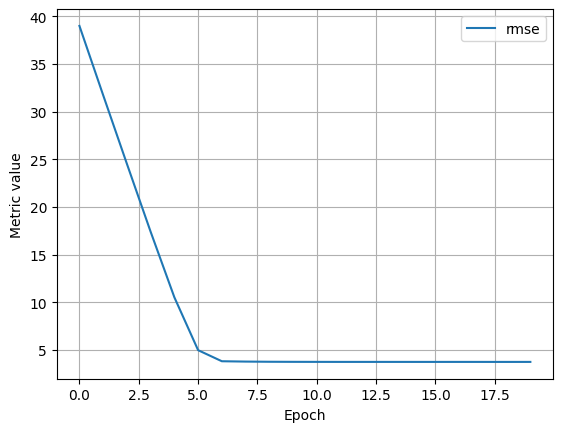

In [52]:
#@title Code - Experiment 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3919.3987 - rmse: 61.3204
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3474.1128 - rmse: 58.7823
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3174.5828 - rmse: 56.1059
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3357.5059 - rmse: 57.8935
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3168.6567 - rmse: 55.9462
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3247.9719 - rmse: 56.7879
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3342.0356 - rmse: 57.6489
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3163.3081 - rmse: 56.0574
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3279.7681 - rmse: 57.2035
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3131.4153 - rmse: 55.5777
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3468.8308 - rmse: 58.7141
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

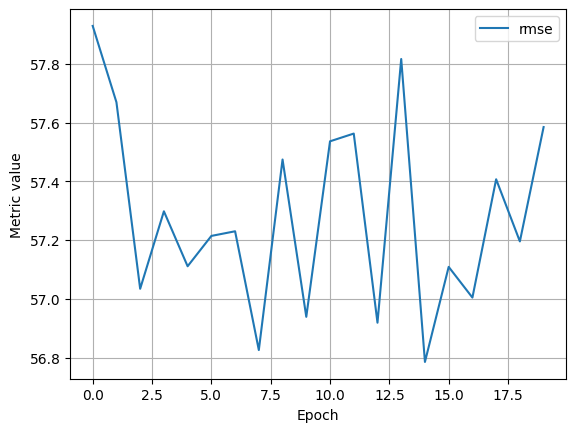

In [53]:
#@title Code - Experiment 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 10.0,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2067.6084 - rmse: 45.4696
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2107.3459 - rmse: 45.9031
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2115.6633 - rmse: 45.9912
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2059.3308 - rmse: 45.3788
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2078.5698 - rmse: 45.5903
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2061.9016 - rmse: 45.4068
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2037.6179 - rmse: 45.1385
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2035.0958 - rmse: 45.1095
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2003.2694 - rmse: 44.7565
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2031.9432 - rmse: 45.0765
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2055.4277 - rmse: 45.3315
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

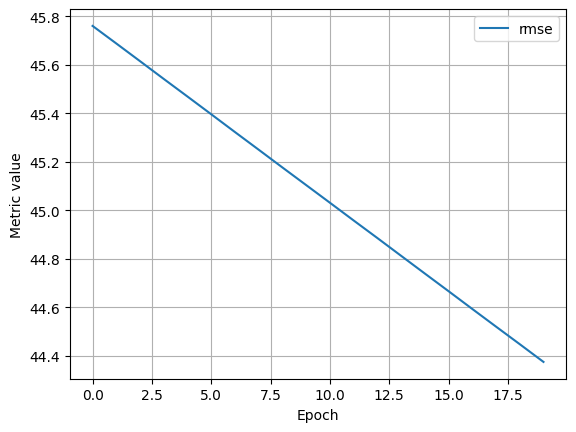

In [54]:
#@title Code - Experiment 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.00001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11356.7285 - rmse: 104.5570
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9127.4102 - rmse: 95.2749
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9303.2354 - rmse: 95.7237
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9114.9648 - rmse: 94.8322
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 9440.0273 - rmse: 97.1201
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9158.9512 - rmse: 95.6138
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9517.0498 - rmse: 97.5057
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8856.3828 - rmse: 93.3675
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8883.8896 - rmse: 93.4080
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9707.9648 - rmse: 98.4259
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10010.7148 - rmse: 99.7585
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/s

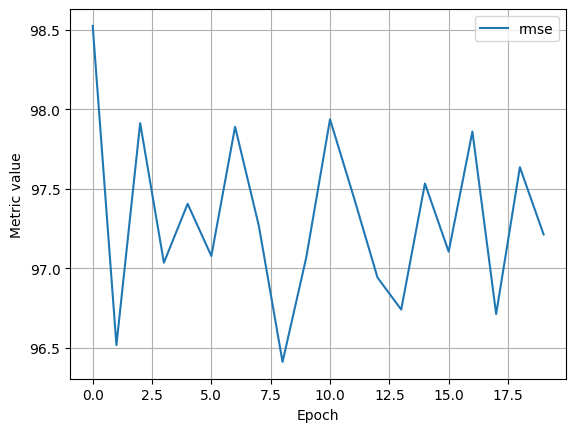

In [55]:
#@title Code - Experiment 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 17.0,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/2
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 429.5025 - rmse: 20.6990
Epoch 2/2
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 184.7763 - rmse: 13.5641
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


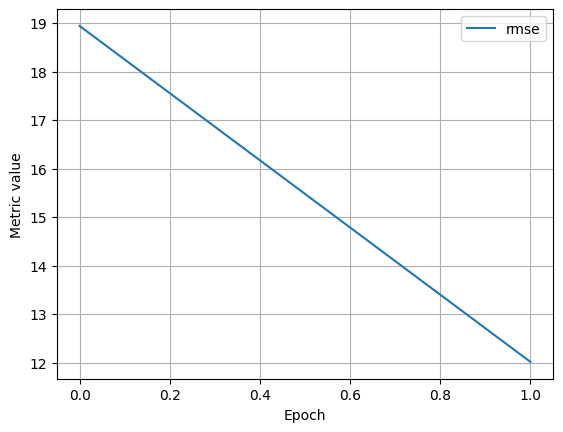

In [56]:
#@title Code - Experiment 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 2,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/35
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1698.2235 - rmse: 41.1911
Epoch 2/35
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1134.9988 - rmse: 33.6728
Epoch 3/35
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 696.3109 - rmse: 26.3691
Epoch 4/35
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 369.3329 - rmse: 19.1885
Epoch 5/35
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 149.5244 - rmse: 12.1939
Epoch 6/35
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 36.4595 - rmse: 6.0022
Epoch 7/35
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.1898 - rmse: 3.7614
Epoch 8/35
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.7059 - rmse: 3.6997
Epoch 9/35
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.6663 - rmse: 3.5499
Epoch 10/35
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.0367 - rmse: 3.7367
Epoch 11/35
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15.1734 - rmse: 3.8872
Epoch 12/35
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.7084 - rm

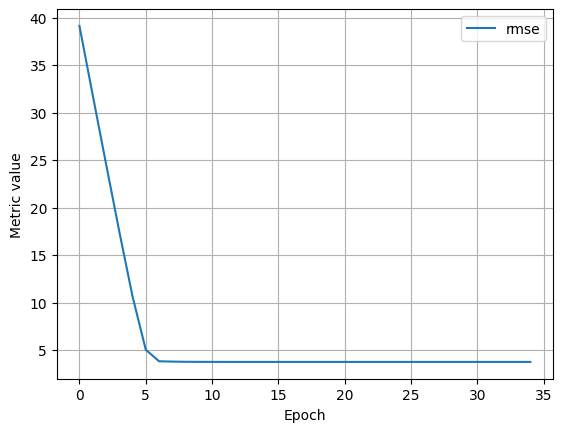

In [57]:
#@title Code - Experiment 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 35,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 856.5449 - rmse: 29.1988
Epoch 2/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 230.8899 - rmse: 15.0932
Epoch 3/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 20.1072 - rmse: 4.4624
Epoch 4/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 14.2388 - rmse: 3.7695
Epoch 5/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13.2136 - rmse: 3.6326
Epoch 6/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 12.9947 - rmse: 3.5975
Epoch 7/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13.1566 - rmse: 3.6190
Epoch 8/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14.8085 - rmse: 3.8431
Epoch 9/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13.6528 - rmse: 3.6786
Epoch 10/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 14.4881 - rmse: 3.7762
Epoch 11/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 15.2055 - rmse: 3.8938
Epoch 12/20
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - lo

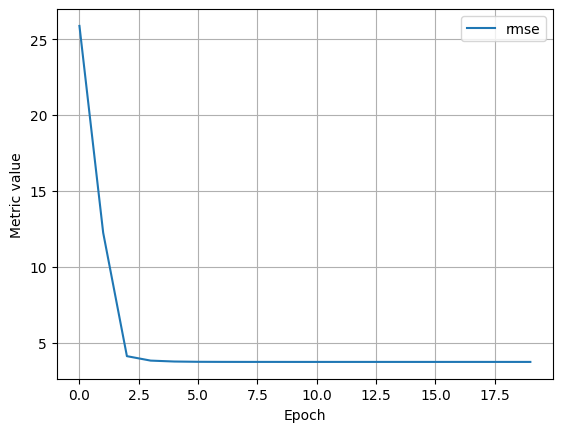

In [58]:
#@title Code - Experiment 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 25,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 949.8701 - rmse: 30.8152
Epoch 2/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 737.0383 - rmse: 27.1438
Epoch 3/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 562.6367 - rmse: 23.7092
Epoch 4/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 395.0757 - rmse: 19.8695
Epoch 5/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 267.8294 - rmse: 16.3575
Epoch 6/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 164.0512 - rmse: 12.7980
Epoch 7/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 87.6822 - rmse: 9.3525
Epoch 8/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40.6312 - rmse: 6.3579
Epoch 9/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.0304 - rmse: 4.4597
Epoch 10/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.6756 - rmse: 3.9582
Epoch 11/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.8133 - rmse: 3.8443
Epoch 12/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.8009 - rm

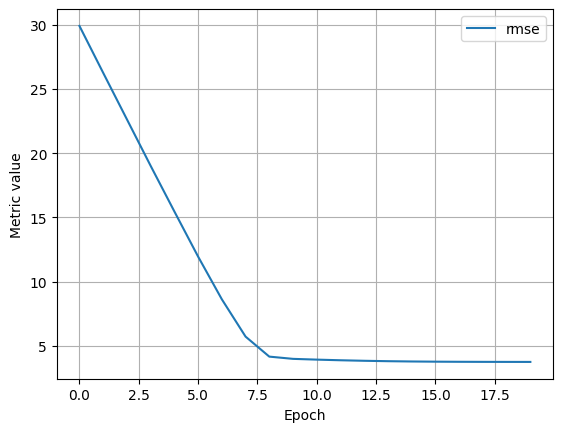

In [59]:
#@title Code - Experiment 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 100,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

In [60]:
#@title Double-click to view answers for training model with one feature

# How many epochs did it take to converge on the final model?
# -----------------------------------------------------------------------------
answer = """
Use the loss curve to see where the loss begins to level off during training.

With this set of hyperparameters:

  learning_rate = 0.001
  epochs = 20
  batch_size = 50

it takes about 5 epochs for the training run to converge to the final model.
"""
print(answer)

# How well does the model fit the sample data?
# -----------------------------------------------------------------------------
answer = '''
It appears from the model plot that the model fits the sample data fairly well.
'''
print(answer)


Use the loss curve to see where the loss begins to level off during training.

With this set of hyperparameters:

  learning_rate = 0.001
  epochs = 20
  batch_size = 50

it takes about 5 epochs for the training run to converge to the final model.


It appears from the model plot that the model fits the sample data fairly well.

